In [1]:
import matplotlib.pyplot as plt
import supy as sp
import pandas as pd
import numpy as np
from time import time
#sp.show_version()

# praktiskt om man vill kunna se alla kolumner och rader i en dataframe
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Sätt Path till runcontrol. Flera runcontrol kan användas om du t.ex. har olika forcing data.
#path_runcontrol = "/Users/juliacederbrant/Handledning_Julia/RunControl.nml"
path_runcontrol = "/Volumes/NO NAME/masterarbete/SuPy/input_data/RunControl.nml"
path_runcontrol

siteselect = pd.read_csv("/Volumes/NO NAME/masterarbete/SuPy/input_data/Input/SUEWS_SiteSelect.txt",        
        delim_whitespace=True,
        error_bad_lines=False,
        header= 1,
        index_col=0,)

#siteselect

# Ladda in inställningarna i runcontrol och SiteSelect i SuPy som en DataFrame
df_state_init = sp.init_supy(path_runcontrol)

#df_state_init.loc[1]

# Grid df_state_init, se ovan. Fler Grids kan användas
grid = df_state_init.index[0] 


forcing_2017 = pd.read_csv("/Volumes/NO NAME/masterarbete/SuPy/input_data/Input/Kb_2017_data_60.txt",        
        delim_whitespace=True,
        error_bad_lines=False,
        header= 0,
        index_col=0)

#forcing_2018

forcing_2018 = pd.read_csv("/Volumes/NO NAME/masterarbete/SuPy/input_data/Input/Kb_2018_data_60.txt",        
        delim_whitespace=True,
        error_bad_lines=False,
        header= 0,
        index_col=0)

#forcing_2018

#sp.load_forcing_grid sätter Datetime som index på forcing data, samst läser in all forcing data!

df_forcing = sp.load_forcing_grid(path_runcontrol, grid)

#sp.check för kolla så att forcing funkar
sp.check_forcing(df_forcing)
#df_forcing

2021-02-26 12:26:02,760 - SuPy - INFO - All cache cleared.
2021-02-26 12:26:05,917 - SuPy - INFO - All cache cleared.
2021-02-26 12:26:11,863 - SuPy - INFO - SuPy is validating `df_forcing`...
2021-02-26 12:26:20,711 - SuPy - INFO - All checks for `df_forcing` passed!


In [2]:
df_output, df_state_final = sp.run_supy(df_forcing, df_state_init)

2021-02-26 12:26:20,767 - SuPy - INFO - ====================
2021-02-26 12:26:20,794 - SuPy - INFO - Simulation period:
2021-02-26 12:26:20,829 - SuPy - INFO -   Start: 2016-12-31 23:05:00
2021-02-26 12:26:20,853 - SuPy - INFO -   End: 2018-12-31 23:00:00
2021-02-26 12:26:20,862 - SuPy - INFO - 
2021-02-26 12:26:20,872 - SuPy - INFO - No. of grids: 4
2021-02-26 12:26:20,888 - SuPy - INFO - SuPy is running in parallel mode
2021-02-26 12:30:11,245 - SuPy - INFO - Execution time: 230.4 s
2021-02-26 12:30:11,621 - SuPy - INFO - ====================



In [3]:
#df_output.columns.levels[0]

In [4]:
#df_output.head()

In [5]:
df_output_base = df_output.SUEWS.loc[1]

df_output_a = df_output.SUEWS.loc[2]

df_output_b = df_output.SUEWS.loc[3]

df_output_c = df_output.SUEWS.loc[4] 

df_output_merge_x=pd.concat([df_output_base, df_output_a, df_output_b, df_output_c],axis=1,join='inner',keys=['base','a', 'b', 'c']).swaplevel(0,1,axis=1).sort_index(axis=1)

In [6]:
df_output_merge_x.loc['2018 01','QS']

,a,b,base,c
datetime,,,,
2018-01-01 00:00:00,-12.248680,-12.248680,-12.248680,-12.248680
2018-01-01 00:05:00,-12.296346,-12.296346,-12.296346,-12.296346
2018-01-01 00:10:00,-12.345285,-12.345285,-12.345285,-12.345285
2018-01-01 00:15:00,-12.395389,-12.395389,-12.395389,-12.395389
2018-01-01 00:20:00,-12.446557,-12.446557,-12.446557,-12.446557
...,...,...,...,...
2018-01-31 23:35:00,-18.516053,-18.516053,-18.516053,-18.516053
2018-01-31 23:40:00,-18.525474,-18.525474,-18.525474,-18.525474
2018-01-31 23:45:00,-18.535235,-18.535235,-18.535235,-18.535235


In [12]:
from datetime import date,datetime

def supy_plot(var, df_in, s,e, size=False):

    if size:   
        size=size
    else:
        size = 10, 6

    fig, axes = plt.subplots(2, 1, sharex=True)
    a = df_in.loc[s:e,[var]]\
        .plot(ax=axes[0],figsize=(size),title=var)

    #f_date = (date(int(s[0:4]),int(s[5:7]),int(s[7:10])))
    #l_date = (date(int(e[0:4]),int(e[5:7]),int(e[7:10])))
    #f_date - datetime.timedelta(days=2)    
    #l_date + datetime.timedelta(days=2)
    
    #plt.hlines(0,f_date - datetime.timedelta(days=2),l_date + datetime.timedelta(days=2),\
        #linestyles='--',colors='grey')
        # byt till dina variabelnamn
    a.legend(['base','a', 'b', 'c'])

    b = df_diff_m=pd.concat([df_in.loc[s:e,(var,'a')]-df_in.loc[s:e,(var,'base')],\
        df_in.loc[s:e,(var,'b')]-df_in.loc[s:e,(var,'base')],\
        df_in.loc[s:e,(var,'c')]-df_in.loc[s:e,(var,'base')],\
        ],\
        axis=1,join='inner',keys=['base', 'a', 'b', 'c']).sort_index(axis=1).\
        plot(ax=axes[1], figsize=(size), title = ('Difference '))

    b.legend(['a', 'b', 'c'])

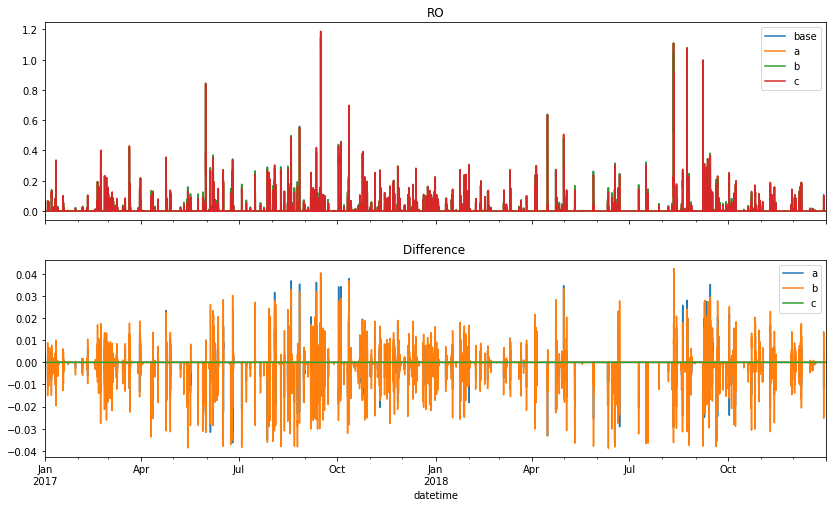

In [13]:
#plot för att jämföra olika scenarion. Base är kville (grid 1), a är kvilleförändrad (grid 2)
s = '2017'
e = '2018'

supy_plot('RO', df_output_merge_x, s,e, size=(14,8))

In [9]:
#df_output_suews_a = df_output_suews_a.SUEWS
#df_output_suews_a.loc['2018 07 01':'2018 07 30','QE'].plot()